In [3]:
import os
import pathlib 
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import pandas as pd
import seaborn as sns
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [4]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Load the images
data_dir = "E:/New/Unbalanced Data"
batch_size = 32
image_size = (224, 224)
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)
train_generator = data_generator.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 48410 images belonging to 8 classes.


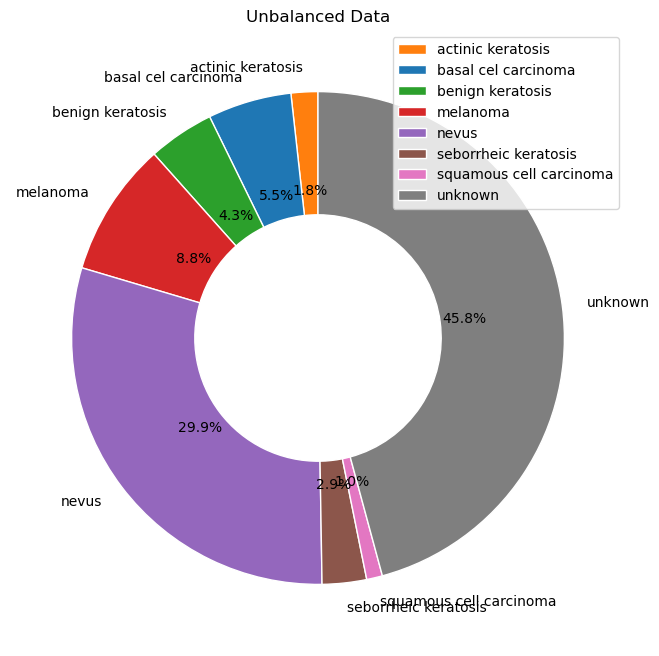

In [17]:
# Count the number of images in each class for unbalanced data
num_images = {}
for cls in train_generator.class_indices:
    num_images[cls] = len(os.listdir(os.path.join(data_dir, cls)))

# Create a doughnut pie chart for unbalanced data
plt.figure(figsize=(8, 8))
plt.title("Unbalanced Data")

# Define colors for the wedges
colors = ["#ff7f0e", "#1f77b4", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"]

# Create the pie chart
wedges, _, _ = plt.pie(num_images.values(), labels=num_images.keys(), colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5, edgecolor='w'))

# Set the center of the pie chart to white to create a hole
plt.setp(wedges, width=0.5, edgecolor='w')

# Add a white circle in the center to create a hole
circle = plt.Circle((0,0), 0.4, color='white')
plt.gca().add_artist(circle)
plt.legend(num_images.keys(), loc='best')
plt.show()

In [5]:
import os
import numpy as np
import tensorflow as tf

data_dir = "E:/New/Unbalanced Data"
balanced_dir = "E:/New/Balanced_2 Data"
if not os.path.exists(balanced_dir):
    os.makedirs(balanced_dir)

image_size = (224, 224)
batch_size = 32

def custom_preprocessing_function(img):
    preprocessing_function=tf.keras.preprocessing.image.random_rotation,
    preprocessing_function=tf.keras.preprocessing.image.random_contrast,
    preprocessing_function=tf.keras.preprocessing.image.random_saturation,
    preprocessing_function=tf.keras.preprocessing.image.GaussianNoise,
    preprocessing_function=tf.keras.preprocessing.image.random_crop
    return img

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    preprocessing_function=custom_preprocessing_function
)

# Data augmentation for balanced data
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    brightness_range=[0.2, 1.0],    # Add brightness range
    channel_shift_range=0.2,        # Add channel shifting
)


# Balance each class to 6000 images
num_classes = 8
total_new_images = 0
for cls_name in os.listdir(data_dir):
    cls_dir = os.path.join(balanced_dir, cls_name)
    if not os.path.exists(cls_dir):
        os.makedirs(cls_dir)

    num_cls_images = len(os.listdir(os.path.join(data_dir, cls_name)))
    num_new_images = 0
#     if num_cls_images < 6000:
    num_duplicates = 6000
    for i in range(num_duplicates):
        for img_file in os.listdir(os.path.join(data_dir, cls_name)):
            img_path = os.path.join(data_dir, cls_name, img_file)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=image_size)
            img = tf.keras.preprocessing.image.img_to_array(img)
            img = data_generator.random_transform(img)
            img = img.astype(np.uint8)
            img = tf.keras.preprocessing.image.array_to_img(img)
            img_path = os.path.join(cls_dir, f"{cls_name}_{i}_{img_file}")
            tf.keras.preprocessing.image.save_img(img_path, img)
            num_new_images += 1
            if num_new_images == 6000:
                break
        if num_new_images == 6000:
            break
    total_new_images += num_new_images

print(f"Total new images generated: {total_new_images}")
balanced_dir = "E:/New/Balanced_2 Data"
num_balanced_images = {}
for cls in train_generator.class_indices:
    num_balanced_images[cls] = len(os.listdir(os.path.join(balanced_dir, cls)))
print(num_balanced_images)

{'actinic keratosis': 6000, 'basal cel carcinoma': 6000, 'benign keratosis': 6000, 'melanoma': 6000, 'nevus': 6000, 'seborrheic keratosis': 6000, 'squamous cell carcinoma': 6000, 'unknown': 6000}


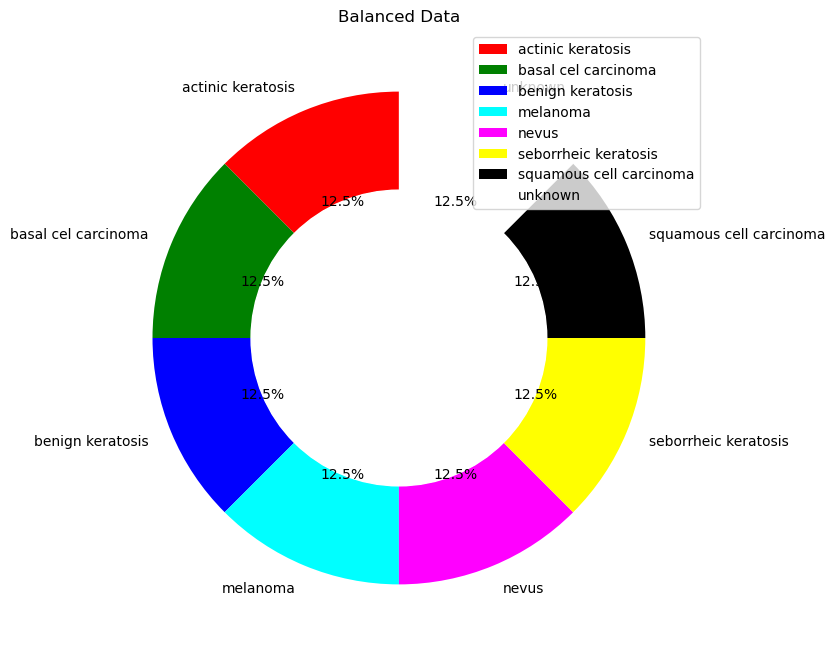

In [19]:
balanced_dir = "E:/New/Balanced Data"
num_balanced_images = {}
for cls in train_generator.class_indices:
    num_balanced_images[cls] = len(os.listdir(os.path.join(balanced_dir, cls)))

# Create a doughnut pie chart for balanced data
plt.figure(figsize=(8, 8))
plt.title("Balanced Data")

# Define colors for the wedges
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'white']

# Create the pie chart
circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(num_balanced_images.values(), labels=num_balanced_images.keys(), colors=colors, wedgeprops=dict(width=0.4), autopct='%1.1f%%', startangle=90)
p = plt.gcf()
p.gca().add_artist(circle)

# Add a legend
plt.legend(num_balanced_images.keys(), loc='best')

plt.show()

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten,GlobalAveragePooling2D, Dropout, BatchNormalization, Concatenate
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator #helps in image Agumentation
from keras.models import Sequential
import numpy as np
from tensorflow.keras.applications import InceptionV3, ResNet50V2, DenseNet121
from glob import glob
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import roc_curve
from keras.layers import GlobalAveragePooling2D, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import image
import tensorflow as tf
from sklearn.metrics import f1_score
from keras import backend as K

In [2]:
train_data_gen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
val_data_gen = ImageDataGenerator(rescale=1./255,
                                 validation_split=0.2)

In [3]:
img_height = 224
img_width = 224
batch_size = 32

In [4]:
# Load the train data
train_data = train_data_gen.flow_from_directory(
    directory="E:/New/Balanced Data",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load the validation data
val_data = val_data_gen.flow_from_directory(
    directory="E:/New/Balanced Data",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 38400 images belonging to 8 classes.
Found 9600 images belonging to 8 classes.


In [10]:
import time
start_time = time.time()
num_classes = 8
# Define class weights
class_weights = {}
for i in range(num_classes):
    class_weights[i] = len(train_data) / (num_classes * np.sum(train_data.classes == i))

# Create a callback to save the best model
checkpoint = ModelCheckpoint("E:/New/Trained Models/Balanced/InceptionV3.h5", monitor="val_accuracy", save_best_only=True)


# Define early stopping callback
earlystop = EarlyStopping(monitor='val_accuracy', patience=7)

def f1_score(y_true, y_pred):
    """Function to calculate the F1 score"""
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

base_model1 = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False)

# Freeze the layers in the base model
for layer in base_model1.layers[:100]:
    layer.trainable = False

# Add a new top layer
x = base_model1.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(8, activation='softmax')(x)

# Combine the base model with the new top layer
model1 = Model(inputs=base_model1.input, outputs=predictions)

# Compile the model with F1-score as the metric
model1.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.AUC(name='prc', curve='PR'), f1_score])

# Train the model
#model1.fit(train_data, steps_per_epoch=282, epochs=20, validation_data=val_data)
history1=model1.fit(train_data, steps_per_epoch=282, epochs=35,validation_steps = 113, validation_data=val_data, class_weight=class_weights,  callbacks=[checkpoint, earlystop])

end_time = time.time()
time_taken = end_time - start_time
hours, rest = divmod(time_taken, 3600)
minutes, seconds = divmod(rest, 60)
print("Time taken by the code: {} hours, {} minutes, and {:.2f} seconds".format(int(hours), int(minutes), seconds))

Epoch 1/35
282/282 [==============================] - 1856s 6s/step - loss: 0.0640 - accuracy: 0.3646 - precision_1: 0.4346 - recall_1: 0.2640 - auc: 0.7616 - prc: 0.3514 - f1_score: 0.3267 - val_loss: 1.8679 - val_accuracy: 0.3803 - val_precision_1: 0.4769 - val_recall_1: 0.1944 - val_auc: 0.7657 - val_prc: 0.3587 - val_f1_score: 0.2733
Epoch 2/35
282/282 [==============================] - 1870s 7s/step - loss: 0.0465 - accuracy: 0.4928 - precision_1: 0.5892 - recall_1: 0.3685 - auc: 0.8560 - prc: 0.5242 - f1_score: 0.4509 - val_loss: 1.8030 - val_accuracy: 0.4096 - val_precision_1: 0.4791 - val_recall_1: 0.2724 - val_auc: 0.7952 - val_prc: 0.3932 - val_f1_score: 0.3465
Epoch 3/35
282/282 [==============================] - 1841s 7s/step - loss: 0.0403 - accuracy: 0.5475 - precision_1: 0.6446 - recall_1: 0.4205 - auc: 0.8872 - prc: 0.5915 - f1_score: 0.5067 - val_loss: 1.6961 - val_accuracy: 0.4549 - val_precision_1: 0.5468 - val_recall_1: 0.3377 - val_auc: 0.8320 - val_prc: 0.4543 - v

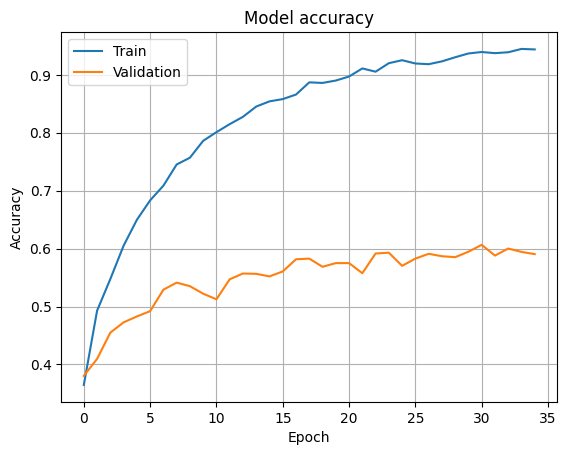

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.grid(True)
# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

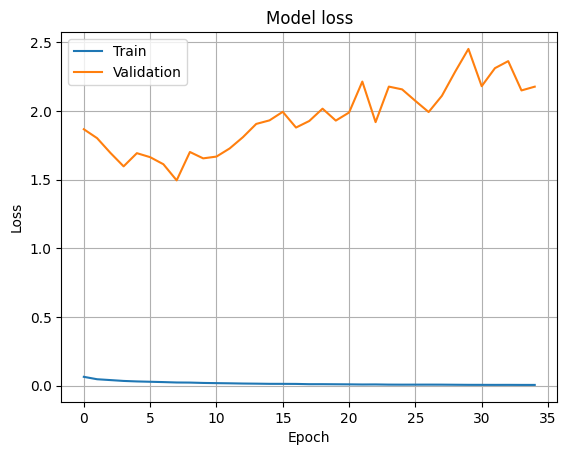

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.grid(True)
# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


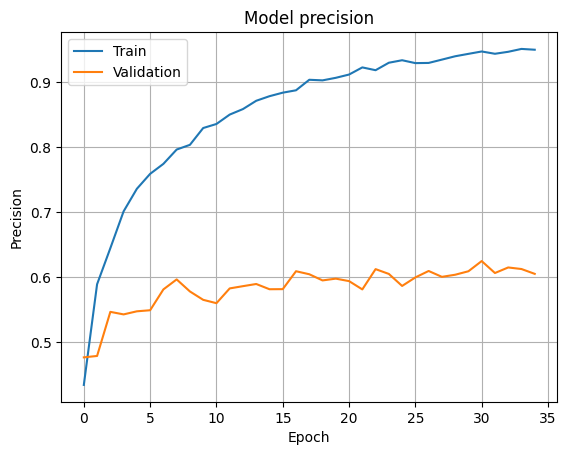

In [23]:
fig, ax = plt.subplots()
ax.grid(True)
# Plot training & validation precision values
plt.plot(history1.history['precision_1'])
plt.plot(history1.history['val_precision_1'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



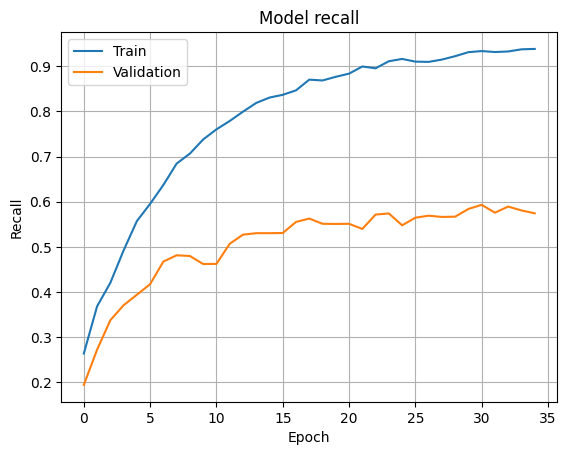

In [24]:
fig, ax = plt.subplots()
ax.grid(True)
# Plot training & validation recall values
plt.plot(history1.history['recall_1'])
plt.plot(history1.history['val_recall_1'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



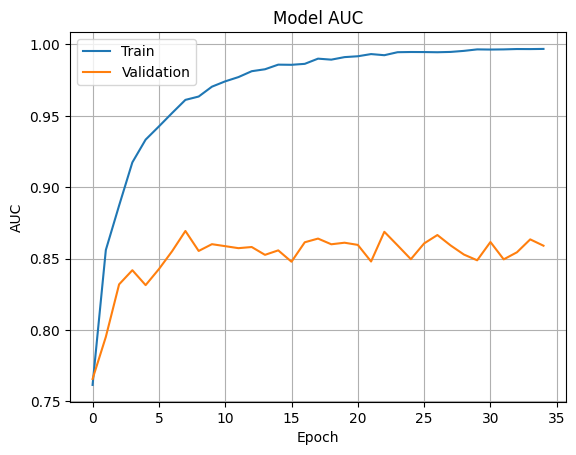

In [25]:
fig, ax = plt.subplots()
ax.grid(True)
# Plot training & validation AUC values
plt.plot(history1.history['auc'])
plt.plot(history1.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



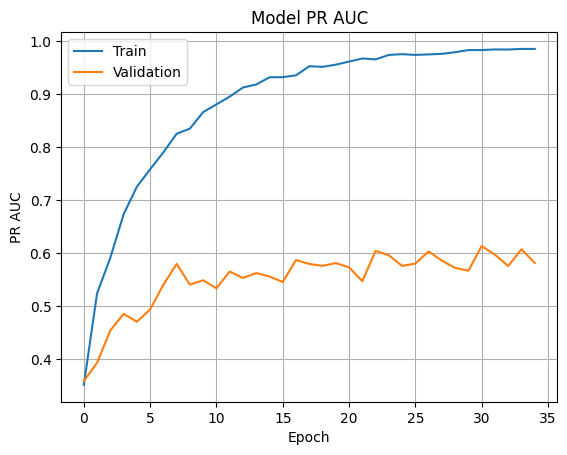

In [26]:
fig, ax = plt.subplots()
ax.grid(True)
# Plot training & validation PR AUC values
plt.plot(history1.history['prc'])
plt.plot(history1.history['val_prc'])
plt.title('Model PR AUC')
plt.ylabel('PR AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



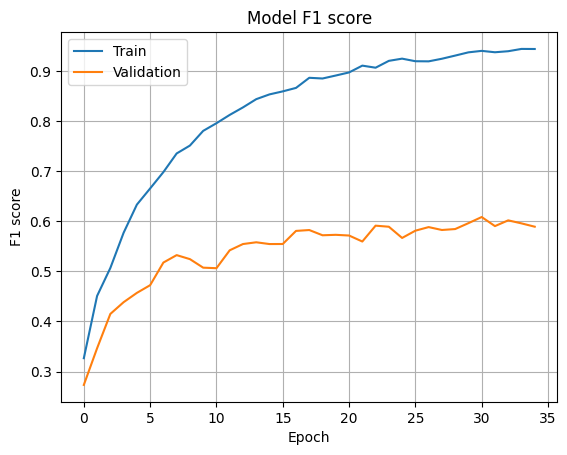

In [27]:
fig, ax = plt.subplots()
ax.grid(True)
# Plot training & validation F1 score values
plt.plot(history1.history['f1_score'])
plt.plot(history1.history['val_f1_score'])
plt.title('Model F1 score')
plt.ylabel('F1 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# predict classes for test data
y_pred = model1.predict(train_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = train_data.classes



1200/1200 [==============================] - 2594s 2s/step


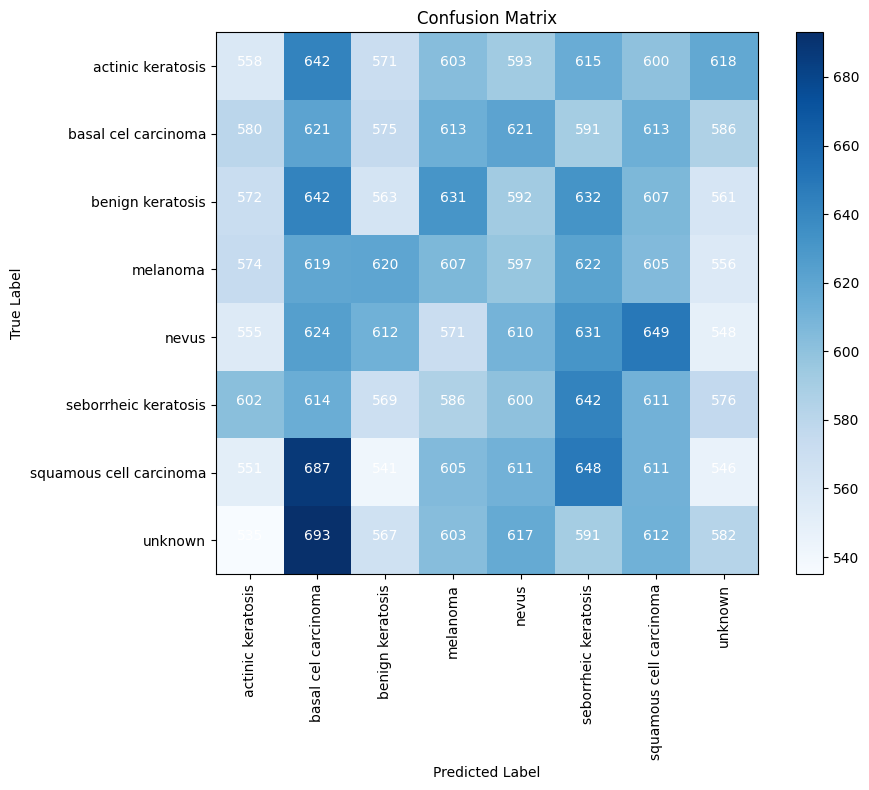

In [19]:
import itertools
class_names = list(train_data.class_indices.keys())
# calculate confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
# plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# label the confusion matrix cells with the count of correctly and incorrectly classified samples
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, format(confusion_mtx[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_mtx[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import numpy as np

# Define the custom metric function
def f1_score(y_true, y_pred):
    # implementation of F1-score calculation
    pass

# Register the custom metric function
tf.keras.utils.get_custom_objects()['f1_score'] = f1_score
# Load the saved model
model = tf.keras.models.load_model("E:/New/Trained Models/Balanced/InceptionV3.h5")

Enter image file path: E:/New/Balanced Data/melanoma/melanoma_0_ISIC_0000029_downsampled.jpg
1/1 [==============================] - 23s 23s/step


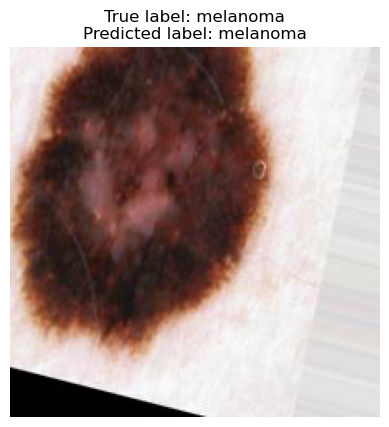

In [61]:
# Get the class names
class_names = list(val_data.class_indices.keys())

# Take input image from user
img_path = input("Enter image file path: ")

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.inception_v3.preprocess_input(x)

# Make prediction
pred = model.predict(x)[0]
pred_class = np.argmax(pred)
pred_class_name = class_names[pred_class]

# Plot the image with true and predicted labels
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.title(f"True label: {img_path.split('/')[-2]}\nPredicted label: {pred_class_name}")
plt.axis("off")
plt.show()


Enter image file path: E:/New/Balanced Data/nevus/nevus_0_ISIC_0026672.jpg
1/1 [==============================] - 2s 2s/step


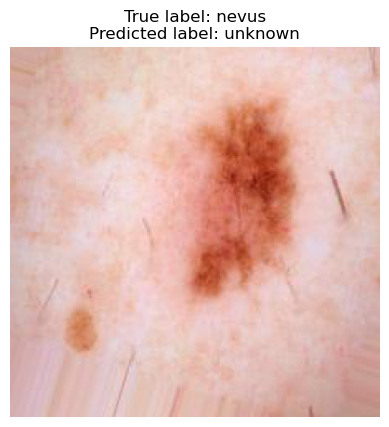

In [62]:
# Get the class names
class_names = list(val_data.class_indices.keys())

# Take input image from user
img_path = input("Enter image file path: ")

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.inception_v3.preprocess_input(x)

# Make prediction
pred = model.predict(x)[0]
pred_class = np.argmax(pred)
pred_class_name = class_names[pred_class]

# Plot the image with true and predicted labels
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.title(f"True label: {img_path.split('/')[-2]}\nPredicted label: {pred_class_name}")
plt.axis("off")
plt.show()


In [6]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

train_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)


val_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [7]:
img_height = 224
img_width = 224
batch_size = 32

In [8]:
train_data = train_data_gen.flow_from_directory(
    directory="E:/New/Balanced Data",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_data = val_data_gen.flow_from_directory(
    directory="E:/New/Balanced Data",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)


Found 48000 images belonging to 8 classes.
Found 48000 images belonging to 8 classes.


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import time
start_time = time.time()
num_classes = 8
# Define class weights
# Define class weights
train_labels = np.array([0] * 480 + [1] * 480 + [2] * 480 + [3] * 480 + [4] * 480 + [5] * 480 + [6] * 480 + [7] * 480)
total_samples = len(train_labels)
class_weights = {i: (total_samples / (num_classes * np.sum(train_labels == i))) for i in range(num_classes)}
# Create a callback to save the best model
model_checkpoint = ModelCheckpoint("Trained Models/Balanced/InceptionV3_New.h5",
                                        monitor="val_f1_score",
                                        save_best_only=True,
                                        mode="max")

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_delta=0.0001)
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_f1_score', patience=7, mode="max")
def f1_score(y_true, y_pred):
    """Function to calculate the F1 score"""
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

base_model2 = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False)

# Freeze the layers in the base model
for layer in base_model2.layers[:100]:
    layer.trainable = False

# Add a new top layer
x = base_model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(8, activation='softmax')(x)

# Combine the base model with the new top layer
model2 = Model(inputs=base_model2.input, outputs=predictions)

# Compile the model with F1-score as the metric
model2.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC(name='auc'), tf.keras.metrics.AUC(name='prc', curve='PR'), f1_score])

# Train the model
#model1.fit(train_data, steps_per_epoch=282, epochs=20, validation_data=val_data)
history2=model2.fit(train_data, steps_per_epoch=282, epochs=35,validation_steps = 113, validation_data=val_data, class_weight=class_weights,  callbacks=[model_checkpoint, early_stopping, reduce_lr],shuffle=True )

end_time = time.time()
time_taken = end_time - start_time
hours, rest = divmod(time_taken, 3600)
minutes, seconds = divmod(rest, 60)
print("Time taken by the code: {} hours, {} minutes, and {:.2f} seconds".format(int(hours), int(minutes), seconds))

D:\Software\AppInstalled\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/35
282/282 [==============================] - 1304s 5s/step - loss: 2.0770 - accuracy: 0.3503 - precision: 0.4221 - recall: 0.2435 - auc: 0.7499 - prc: 0.3333 - f1_score: 0.3074 - val_loss: 1.4174 - val_accuracy: 0.4923 - val_precision: 0.6416 - val_recall: 0.2738 - val_auc: 0.8583 - val_prc: 0.5034 - val_f1_score: 0.3814 - lr: 1.0000e-04
Epoch 2/35
282/282 [==============================] - 24818s 88s/step - loss: 1.6266 - accuracy: 0.4492 - precision: 0.5548 - recall: 0.3073 - auc: 0.8305 - prc: 0.4551 - f1_score: 0.3931 - val_loss: 1.3084 - val_accuracy: 0.5401 - val_precision: 0.6631 - val_recall: 0.3767 - val_auc: 0.8820 - val_prc: 0.5581 - val_f1_score: 0.4785 - lr: 1.0000e-04
Epoch 3/35
282/282 [==============================] - 956s 3s/step - loss: 1.4303 - accuracy: 0.5095 - precision: 0.6062 - recall: 0.3785 - auc: 0.8670 - prc: 0.5369 - f1_score: 0.4636 - val_loss: 1.0926 - val_accuracy: 0.6004 - val_precision: 0.7376 - val_recall: 0.4292 - val_auc: 0.9160 - val_prc:

Epoch 24/35
282/282 [==============================] - 1030s 4s/step - loss: 0.2436 - accuracy: 0.9136 - precision: 0.9252 - recall: 0.9038 - auc: 0.9945 - prc: 0.9724 - f1_score: 0.9143 - val_loss: 0.1440 - val_accuracy: 0.9455 - val_precision: 0.9511 - val_recall: 0.9408 - val_auc: 0.9980 - val_prc: 0.9904 - val_f1_score: 0.9458 - lr: 1.0000e-05
Epoch 25/35
282/282 [==============================] - 1108s 4s/step - loss: 0.2376 - accuracy: 0.9191 - precision: 0.9292 - recall: 0.9098 - auc: 0.9944 - prc: 0.9732 - f1_score: 0.9192 - val_loss: 0.1307 - val_accuracy: 0.9596 - val_precision: 0.9633 - val_recall: 0.9577 - val_auc: 0.9980 - val_prc: 0.9909 - val_f1_score: 0.9604 - lr: 1.0000e-05
Epoch 26/35
282/282 [==============================] - 1048s 4s/step - loss: 0.2110 - accuracy: 0.9306 - precision: 0.9385 - recall: 0.9214 - auc: 0.9954 - prc: 0.9782 - f1_score: 0.9297 - val_loss: 0.1110 - val_accuracy: 0.9663 - val_precision: 0.9702 - val_recall: 0.9629 - val_auc: 0.9982 - val_pr

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import numpy as np

# Define the custom metric function
def f1_score(y_true, y_pred):
    # implementation of F1-score calculation
    pass

# Register the custom metric function
tf.keras.utils.get_custom_objects()['f1_score'] = f1_score
# Load the saved model
model = tf.keras.models.load_model("E:/New/Trained Models/Balanced/InceptionV3_New.h5")

Enter image file path: E:/New/Balanced Data/nevus/nevus_0_ISIC_0026672.jpg
1/1 [==============================] - 5s 5s/step


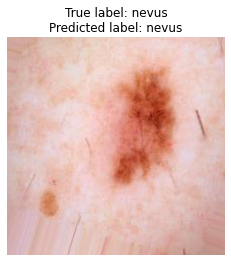

In [12]:
# Get the class names
class_names = list(val_data.class_indices.keys())

# Take input image from user
img_path = input("Enter image file path: ")

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.inception_v3.preprocess_input(x)

# Make prediction
pred = model.predict(x)[0]
pred_class = np.argmax(pred)
pred_class_name = class_names[pred_class]

# Plot the image with true and predicted labels
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.title(f"True label: {img_path.split('/')[-2]}\nPredicted label: {pred_class_name}")
plt.axis("off")
plt.show()


Enter image file path: E:/New/Balanced Data/melanoma/melanoma_0_ISIC_0000036_downsampled.jpg
1/1 [==============================] - 0s 109ms/step


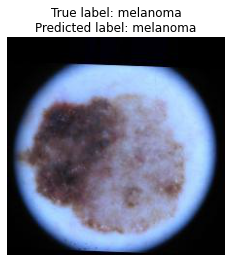

In [13]:
# Get the class names
class_names = list(val_data.class_indices.keys())

# Take input image from user
img_path = input("Enter image file path: ")

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.inception_v3.preprocess_input(x)

# Make prediction
pred = model.predict(x)[0]
pred_class = np.argmax(pred)
pred_class_name = class_names[pred_class]

# Plot the image with true and predicted labels
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.title(f"True label: {img_path.split('/')[-2]}\nPredicted label: {pred_class_name}")
plt.axis("off")
plt.show()


In [ ]:
melanoma_0_ISIC_0000036_downsampled